Digit Recognizer 🚦 🎱
=====

Reference
- Kaggle 'Minimum Distance Classifier' by OLGA CHERNYTSKA : https://www.kaggle.com/code/olhacher/minimum-distance-classifier
- [Python] Example of implementing MNIST character recognition using Keras (Korean) : https://yong0810.tistory.com/18
- Kaggle 'MNIST Neural Network Visualization' by MICHAEL MOMMERT : https://www.kaggle.com/code/mommermi/mnist-neural-network-visualization/notebook
- Kaggle'PCA decomposition and Keras neural network' by PIOTR MILEWSKI : https://www.kaggle.com/code/pmmilewski/pca-decomposition-and-keras-neural-network

In [2]:
# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import sklearn
import sklearn.cluster
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ipycanvas import canvas
from Visualization import *

import matplotlib.animation
import tensorflow as tf
#import tensorflow.keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical, plot_model
plt.rcParams["animation.html"] = "jshtml"

In [3]:
# load data
X = pd.read_csv('input/train.csv')
y = X.iloc[:,0]

## Sample Visualization

In [4]:
label_1=X.loc[X['label']==1] # Slicing rows is label '1' 
label_1idx=label_1.index # Extract index of data 'label_1'

In [5]:
rdsample = pd.DataFrame([])
rdsample_list = rd.sample(list(label_1idx),100) # 100 random samples of label '1'
rdsample = X.iloc[rdsample_list,:]
Visualization(X, rdsample)

Canvas(height=560, sync_image_data=True, width=560)

## Split Data

In [4]:
ratio = 25 # Split ratio(Test Sets Ratio)[%]
ratio = ratio/100

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ratio, shuffle=True, random_state=99)

In [6]:
print(y_train.value_counts().sort_index())
print(y_train.count())
train_No = y_train.count()
print(y_test.value_counts().sort_index())
print(y_test.count())
test_No = y_test.count()

0    3104
1    3498
2    3108
3    3230
4    3085
5    2871
6    3086
7    3326
8    3077
9    3115
Name: label, dtype: int64
31500
0    1028
1    1186
2    1069
3    1121
4     987
5     924
6    1051
7    1075
8     986
9    1073
Name: label, dtype: int64
10500


## Decreasing Size of Train Set
K-Means Clustering

In [8]:
digit = pd.DataFrame();
centroids = pd.DataFrame();
for i in range(0,10):
    digit = X_train.loc[X['label']==i]
    kmeans = sklearn.cluster.KMeans(n_clusters=50, init='k-means++',n_init=1, max_iter = 20).fit(digit)
    centroids = pd.concat([centroids,pd.DataFrame(kmeans.cluster_centers_).astype(int)]).reset_index(drop=True)
X_t = centroids.iloc[:,1:]
y_t = centroids.iloc[:,0]
print(y_t.value_counts())

0    50
1    50
2    50
3    50
4    50
5    50
6    50
7    50
8    50
9    50
Name: 0, dtype: int64


### Cluster Centroid Visualization

In [9]:
rdsample = pd.DataFrame([])
rdsample_list = rd.sample(list(X_t),100) # 100 random samples of cluster centroid
rdsample = X.iloc[rdsample_list,:]
Visualization(X, rdsample)

Canvas(height=560, sync_image_data=True, width=560)

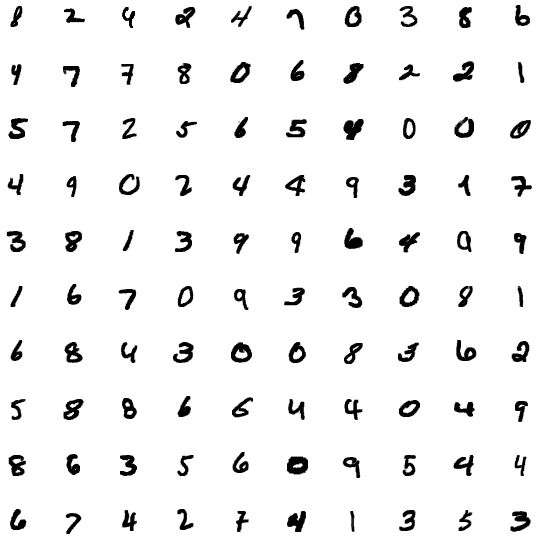

## Prediction

### Test Set

In [14]:
# Attempt to DataFrame : can Not use it
# d = pd.DataFrame();
# d_sum = pd.DataFrame();
# distances = pd.DataFrame();
# m = len(X_t);
# n = len(X_test);
# p_max = int(n / 500); # Max rows of Dataframe in Jypyterlab : 500
# range_op = 0; # for j range
# for j range
# for p in range(0,1): # 1 <- p_max
#    range_op1 = 500 * p
#    range_op2 = 500 * (p+1)

# for j in range(range_op1,range_op2):
#        d = (X_t.iloc[k,:] - X_test.iloc[j,1:])*(X_t.iloc[k,:] - X_test.iloc[j,1:])
#    d_sum = pd.DataFrame(d.sum(axis=1))
#    d_sum = d_sum.transpose()
#    distances = distances.append(pd.DataFrame(d_sum).astype(int), ignore_index=True)
# d.to_csv('TestData\d')
# d_sum.to_csv('TestData/d_sum')
# distances.to_csv('TestData/distances')

In [97]:
%%time
distances_test = np.array([]);
minidx_test = np.array([]);
m = len(X_t)
n = len(X_test)
p_max = int(n / 500);
range_op = 0; # for j range
# for j range
for p in range(0,p_max):
    range_op1 = 500 * p
    range_op2 = 500 * (p+1)
    # Calculating distances
    for j in range(range_op1, range_op2): 
        replica = [X_test.iloc[j,1:] for k in range(0,m)]
        replica = np.array(replica)
        d = (X_t - replica)*(X_t - replica) # Calculate MSE
        d_sum = d.sum(axis=1) # d rowsums
        minidx_test = np.append(minidx_test, np.argmin(d_sum)).astype(int) # index of min value on rowsums
        distances_test = np.append(distances_test,d_sum,axis=0).astype(int) # store d_sum value

print('Complete.')       

Complete.
Wall time: 12min 20s


In [101]:
result_test = minidx_test // 50
zerocounts_test1 = result_test - y_test
zerocounts_test2 = len(zerocounts_test1[zerocounts_test1==0])
accuracy_test = (zerocounts_test2 / len(X_test)) * 100
print('accuracy(test_set):{:.2f}%'.format(accuracy_test))

accuracy(test_set):94.58%


In [99]:
result_table0 = pd.DataFrame([])
result_table0 = pd.concat([result_table0,pd.DataFrame(y_test).value_counts().sort_index()]).astype(int)
result_table0 = pd.concat([result_table0,pd.DataFrame(result_test).value_counts().sort_index()],axis=1).astype(int)
result_table0.index = ['0','1','2','3','4','5','6','7','8','9']
result_table0.columns = ['Prediction','Actual']
result_table0.transpose()

,0,1,2,3,4,5,6,7,8,9
Prediction,1028,1186,1069,1121,987,924,1051,1075,986,1073
Actual,1028,1218,1052,1093,985,944,1062,1071,972,1075


#### Visualization : Test Set vs Cluster Centroid

##### Test Set

In [100]:
X_test2 = X_test.iloc[100:200,:]
Visualization(X, X_test2)

Canvas(height=560, sync_image_data=True, width=560)

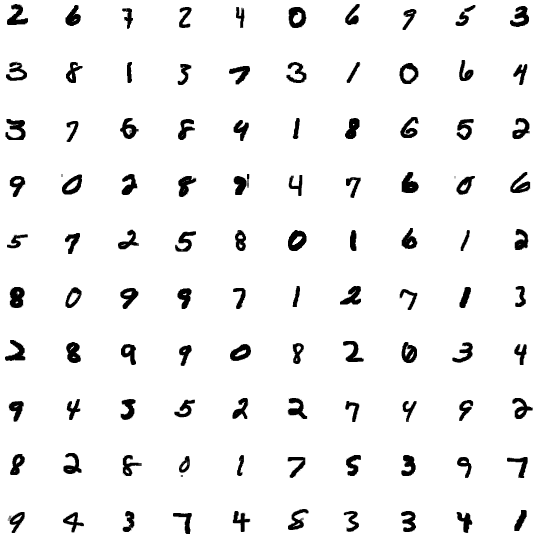

##### Cluster Centroid

In [13]:
X_t2 = X_t.iloc[minidx_test[100:200],:]
Visualization(X, X_t2)

NameError: name 'minidx_test' is not defined

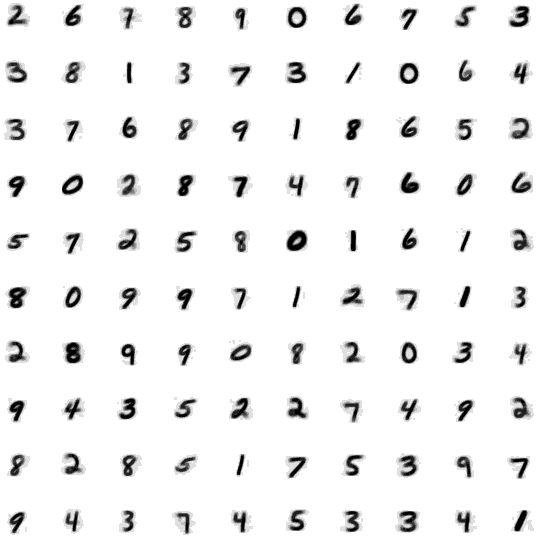

### Train Set

In [93]:
%%time
distances_train = np.array([]);
m = len(X_t)
n = len(X_train)
minidx_train = np.array([]);
p_max = int(n / 500);
range_op = 0; # for j range
# for j range
for p in range(0,p_max):
    range_op1 = 500 * p
    range_op2 = 500 * (p+1)
    # Calculating distances
    for j in range(range_op1, range_op2): 
        replica = [X_train.iloc[j,1:] for k in range(0,m)]
        replica = np.array(replica)
        d = (X_t - replica)*(X_t - replica)
        d_sum = d.sum(axis=1)
        minidx_train = np.append(minidx_train, np.argmin(d_sum)).astype(int)
        distances_train = np.append(distances_train,d_sum,axis=0).astype(int)

print('Complete.')       

Complete.
Wall time: 48min 46s


In [96]:
result_train = minidx_train // 50
zerocounts_train1 = result_train - y_train
zerocounts_train2 = len(zerocounts_train1[zerocounts_train1==0])
accuracy_train = (zerocounts_train2 / len(X_train)) * 100
print('accuracy(train_set):{:.2f}%'.format(accuracy_train))

accuracy(train_set):96.46%


In [12]:
result_table = pd.DataFrame([])
result_table = pd.concat([result_table,pd.DataFrame(y_train).value_counts().sort_index()]).astype(int)
result_table = pd.concat([result_table,pd.DataFrame(result_train).value_counts().sort_index()],axis=1).astype(int)
result_table.index = ['0','1','2','3','4','5','6','7','8','9']
result_table.columns = ['Prediction','Actual']
result_table.transpose()

NameError: name 'result_train' is not defined

## Experiments

### k-NN method

In [102]:
%%time
distances_test_part = pd.DataFrame([])
minidxgroup_test = np.array([])
result_test2 = np.array([])
p_max = int(len(distances_test) / 500);
range_op = 0; # for j range
# for j range
for p in range(0,p_max):
    range_op1 = 500 * p
    range_op2 = 500 * (p+1)
    
    distances_test_part = pd.DataFrame(distances_test[range_op1:range_op2])
    distances_test_part = distances_test_part.sort_values(by=0,axis=0)
    minidxgroup_test = distances_test_part.iloc[0:3,:].index
    minidxgroup_test = minidxgroup_test // 50
    value_set, value_count = np.unique(minidxgroup_test, return_counts = True)
    decision_test = value_set[value_count == value_count.max()]
    if len(decision_test) > 1:
        decision_test = decision_test[0]
    result_test2 = np.append(result_test2, decision_test).astype(int)

print('Complete.')

Complete.
Wall time: 4.51 s


In [103]:
zerocounts_test1_2 = result_test2 - y_test
zerocounts_test2_2 = len(zerocounts_test1_2[zerocounts_test1_2==0])
accuracy_test = (zerocounts_test2_2 / len(X_test)) * 100
print('accuracy(test_set):{:.2f}%'.format(accuracy_test))

accuracy(test_set):93.47%


In [104]:
result_table = pd.DataFrame([])
result_table = pd.concat([result_table,pd.DataFrame(result_test2).value_counts().sort_index()]).astype(int)
result_table = pd.concat([result_table,pd.DataFrame(y_test).value_counts().sort_index()],axis=1).astype(int)
result_table.index = ['0','1','2','3','4','5','6','7','8','9']
result_table.columns = ['prediction','actual']
result_table.transpose()

,0,1,2,3,4,5,6,7,8,9
prediction,1056,1261,1088,1131,997,900,1051,1023,932,1061
actual,1028,1186,1069,1121,987,924,1051,1075,986,1073


### Increasing Centroids (k-Means Method)

In [110]:
digit2 = pd.DataFrame();
centroids2 = pd.DataFrame();
for i in range(0,10):
    digit2 = X_train.loc[X['label']==i]
    kmeans2 = sklearn.cluster.KMeans(n_clusters=75, init='k-means++',n_init=1, max_iter = 20).fit(digit2)
    centroids2 = pd.concat([centroids2,pd.DataFrame(kmeans2.cluster_centers_).astype(int)]).reset_index(drop=True)
X_t2 = centroids2.iloc[:,1:]
y_t2 = centroids2.iloc[:,0]
print(y_t2.value_counts())

0    75
1    75
2    75
3    75
4    75
5    75
6    75
7    75
8    75
9    75
Name: 0, dtype: int64


In [115]:
%%time
distances_test2 = np.array([]);
minidx_test2 = np.array([]);
m = len(X_t2)
n = len(X_test)
p_max = int(n / 500);
range_op = 0; # for j range
# for j range
for p in range(0,p_max):
    range_op1 = 500 * p
    range_op2 = 500 * (p+1)
    # Calculating distances
    for j in range(range_op1, range_op2): 
        replica = [X_test.iloc[j,1:] for k in range(0,m)]
        replica = np.array(replica)
        d = (X_t2 - replica)*(X_t2 - replica) # Calculate MSE
        d_sum = d.sum(axis=1) # d rowsums
        minidx_test2 = np.append(minidx_test2, np.argmin(d_sum)).astype(int) # index of min value on rowsums
        distances_test2 = np.append(distances_test2,d_sum,axis=0).astype(int) # store d_sum value

print('Complete.')       

Complete.
Wall time: 20min


In [118]:
result_test2 = minidx_test2 // 75
zerocounts_test1 = result_test2 - y_test
zerocounts_test2 = len(zerocounts_test1[zerocounts_test1==0])
accuracy_test2 = (zerocounts_test2 / len(X_test)) * 100
print('accuracy(test_set):{:.2f}%'.format(accuracy_test2))

accuracy(test_set):95.13%


In [120]:
result_table2 = pd.DataFrame([])
result_table2 = pd.concat([result_table2,pd.DataFrame(y_test).value_counts().sort_index()]).astype(int)
result_table2 = pd.concat([result_table2,pd.DataFrame(result_test2).value_counts().sort_index()],axis=1).astype(int)
result_table2.index = ['0','1','2','3','4','5','6','7','8','9']
result_table2.columns = ['Prediction','Actual']
result_table2.transpose()

,0,1,2,3,4,5,6,7,8,9
Prediction,1028,1186,1069,1121,987,924,1051,1075,986,1073
Actual,1033,1207,1058,1098,987,930,1065,1080,971,1071


In [121]:
digit3 = pd.DataFrame();
centroids3 = pd.DataFrame();
for i in range(0,10):
    digit3 = X_train.loc[X['label']==i]
    kmeans3 = sklearn.cluster.KMeans(n_clusters=100, init='k-means++',n_init=1, max_iter = 20).fit(digit3)
    centroids3 = pd.concat([centroids3,pd.DataFrame(kmeans3.cluster_centers_).astype(int)]).reset_index(drop=True)
X_t3 = centroids3.iloc[:,1:]
y_t3 = centroids3.iloc[:,0]
print(y_t3.value_counts())

0    100
1    100
2    100
3    100
4    100
5    100
6    100
7    100
8    100
9    100
Name: 0, dtype: int64


In [122]:
%%time
distances_test3 = np.array([]);
minidx_test3 = np.array([]);
m = len(X_t3)
n = len(X_test)
p_max = int(n / 500);
range_op = 0; # for j range
# for j range
for p in range(0,p_max):
    range_op1 = 500 * p
    range_op2 = 500 * (p+1)
    # Calculating distances
    for j in range(range_op1, range_op2): 
        replica = [X_test.iloc[j,1:] for k in range(0,m)]
        replica = np.array(replica)
        d = (X_t3 - replica)*(X_t3 - replica) # Calculate MSE
        d_sum = d.sum(axis=1) # d rowsums
        minidx_test3 = np.append(minidx_test3, np.argmin(d_sum)).astype(int) # index of min value on rowsums
        distances_test3 = np.append(distances_test3,d_sum,axis=0).astype(int) # store d_sum value

print('Complete.')       

Complete.
Wall time: 25min 15s


In [124]:
result_test3 = minidx_test3 // 100
zerocounts_test1 = result_test3 - y_test
zerocounts_test2 = len(zerocounts_test1[zerocounts_test1==0])
accuracy_test3 = (zerocounts_test2 / len(X_test)) * 100
print('accuracy(test_set):{:.2f}%'.format(accuracy_test3))

accuracy(test_set):95.53%


In [125]:
result_table3 = pd.DataFrame([])
result_table3 = pd.concat([result_table3,pd.DataFrame(y_test).value_counts().sort_index()]).astype(int)
result_table3 = pd.concat([result_table3,pd.DataFrame(result_test3).value_counts().sort_index()],axis=1).astype(int)
result_table3.index = ['0','1','2','3','4','5','6','7','8','9']
result_table3.columns = ['Prediction','Actual']
result_table3.transpose()

,0,1,2,3,4,5,6,7,8,9
Prediction,1028,1186,1069,1121,987,924,1051,1075,986,1073
Actual,1035,1215,1049,1104,995,943,1056,1074,959,1070


## Neural Networks

### Model.1

In [7]:
# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_trainN = to_categorical(y_train)
y_testN = to_categorical(y_test)

# normalize
X_trainN = np.array(X_train.iloc[:,1:] / 255)
X_testN = np.array(X_test.iloc[:,1:] / 255)

# network parameters
input_size = X_trainN.shape[1]
batch_size = 64
dropout = 0.25

In [7]:
# this model is a 3-layer MLP with ReLU and dropout after each layer
model_1 = tf.keras.models.Sequential()
model_1.add(layers.Dense(256, input_dim=input_size))
model_1.add(layers.Activation('relu'))
model_1.add(layers.Dropout(dropout))
model_1.add(layers.Dense(64))
model_1.add(layers.Activation('relu'))
model_1.add(layers.Dropout(dropout))
model_1.add(layers.Dense(num_labels))
model_1.add(layers.Activation('softmax'))
model_1.summary()

# loss function for one-hot vector using adam optimizer
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                6

In [8]:
# train the model
model_1.fit(X_trainN, y_trainN, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model_1.evaluate(X_testN, y_testN, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
493/493 [==============================] - 5s 3ms/step - loss: 0.4452 - accuracy: 0.8658
Epoch 2/20
493/493 [==============================] - 1s 3ms/step - loss: 0.1958 - accuracy: 0.9423
Epoch 3/20
493/493 [==============================] - 1s 2ms/step - loss: 0.1425 - accuracy: 0.9571
Epoch 4/20
493/493 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9653
Epoch 5/20
493/493 [==============================] - 1s 2ms/step - loss: 0.0941 - accuracy: 0.9709
Epoch 6/20
493/493 [==============================] - 1s 2ms/step - loss: 0.0826 - accuracy: 0.9749
Epoch 7/20
493/493 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9782
Epoch 8/20
493/493 [==============================] - 1s 2ms/step - loss: 0.0608 - accuracy: 0.9809
Epoch 9/20
493/493 [==============================] - 1s 2ms/step - loss: 0.0535 - accuracy: 0.9829
Epoch 10/20
493/493 [==============================] - 1s 2ms/step - loss: 0.0557 - accuracy: 0.9830

In [18]:
get_layer_output_1 = tf.keras.backend.function([model_1.layers[0].input],
                              [model_1.layers[1].output, model_1.layers[4].output, model_1.layers[7].output])

layer1_output_1, layer2_output_1, layer3_output_1 = get_layer_output_1([X_trainN])

In [14]:
train_ids = [np.arange(len(y_trainN))[y_trainN[:,ids] == 1] for ids in range(10)]

In [20]:
%%capture
%matplotlib inline

# digit to be plotted
digit = 7

# indices of frames to be plotted for this digit
n = range(50)

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
    
ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)   

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)    
        
def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(X_trainN[train_ids[digit][id]].reshape((28,28)), animated=True)
    layer1_plot = ax2.imshow(layer1_output_1[train_ids[digit][id]].reshape((16,16)), animated=True)
    layer2_plot = ax3.imshow(layer2_output_1[train_ids[digit][id]].reshape((8,8)), animated=True)
    output_plot = ax4.imshow(np.append(layer3_output_1[train_ids[digit][id]], 
                                       [np.nan, np.nan]).reshape((3,4)), animated=True)
    return digit_plot, layer1_plot, layer2_plot, output_plot

# define animation
ani_1 = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [21]:
ani_1

### Model.2

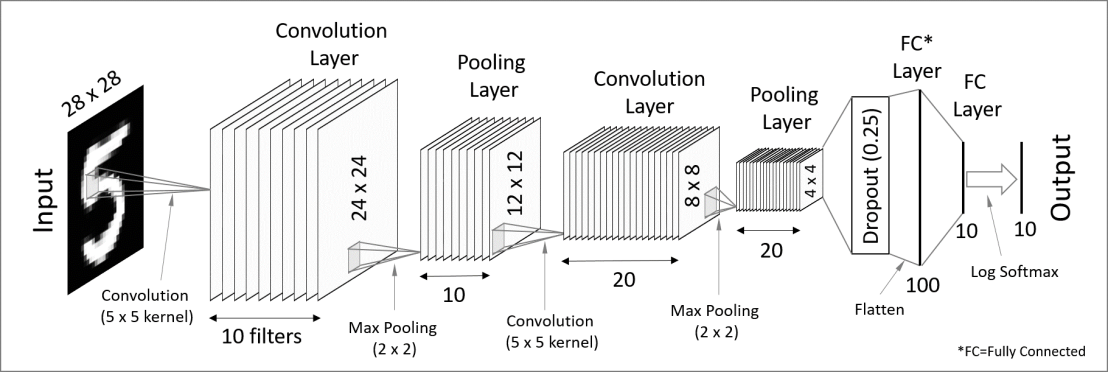

In [10]:
# 28 x 28 reshape
train_images = X_trainN.reshape((train_No, 28, 28, 1))
train_labels = np.array(X_train.iloc[:,0])
test_images = X_testN.reshape((test_No, 28, 28, 1))
test_labels = np.array(X_test.iloc[:,0])

In [11]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(20, (5, 5), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))
 
model_2.add(layers.Flatten())
model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))
model_2.summary()
 
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model_2.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 20)          0         
                                                                 
 flatten_1 (Flatten)         (None, 320)              

#### Visualization

In [12]:
get_layer_output_2 = tf.keras.backend.function([model_2.layers[0].input],
                              [model_2.layers[0].output, model_2.layers[1].output, model_2.layers[2].output, model_2.layers[3].output, model_2.layers[6].output, model_2.layers[7].output])

layer1_output_2, layer2_output_2, layer3_output_2, layer4_output_2, layer6_output_2, layer7_output_2 = get_layer_output_2([train_images])

##### Example1

NameError: name 'train_ids' is not defined

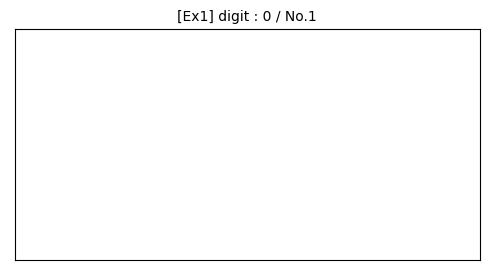

In [13]:
# Example1 selection
digit_ex1 = 0 # digit set
ex1_no = 0 # Number of digit setted

f, ax_ex1 = plt.subplots(1, 1, figsize=(6,3))

ax_ex1.axes.get_xaxis().set_visible(False)
ax_ex1.axes.get_yaxis().set_visible(False)
ax_ex1.set_title('[Ex1] digit : 0 / No.{}'.format(ex1_no + 1), fontsize=10)
ex1_plot = ax_ex1.imshow(X_trainN[train_ids[digit_ex1]][ex1_no].reshape((28,28)))

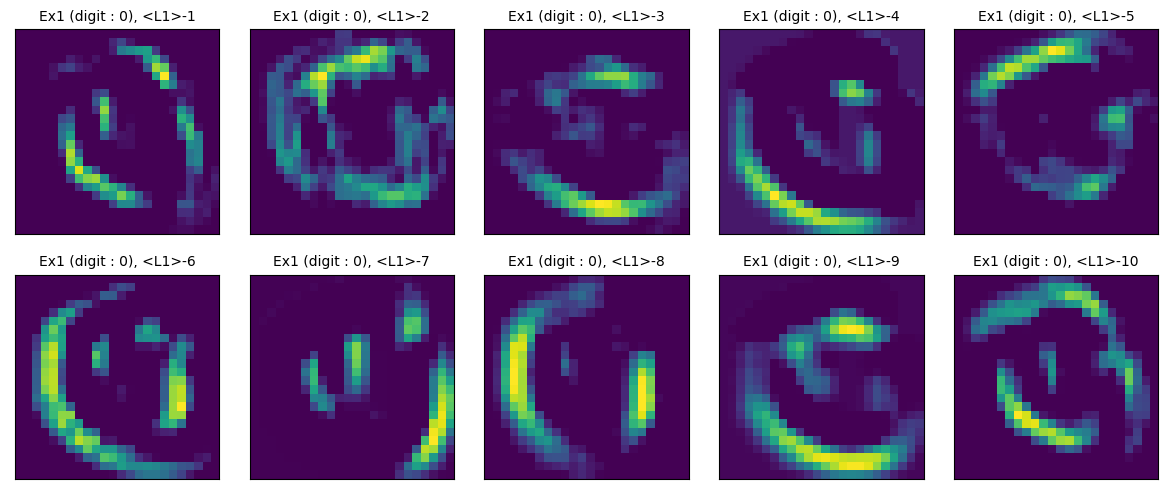

In [27]:
# Example1 1st Convolution Layer (L1)
l1_filters = 10; # Number of Filters
    
f, ax_arr = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l1_filters:
        ax.set_title('Ex1 (digit : {}), <L1>-{}'.format(digit_ex1,k+1), fontsize=10)
        ex1_l1_plot = ax.imshow(layer1_output_2[train_ids[digit_ex1]][ex1_no][:,:,k])

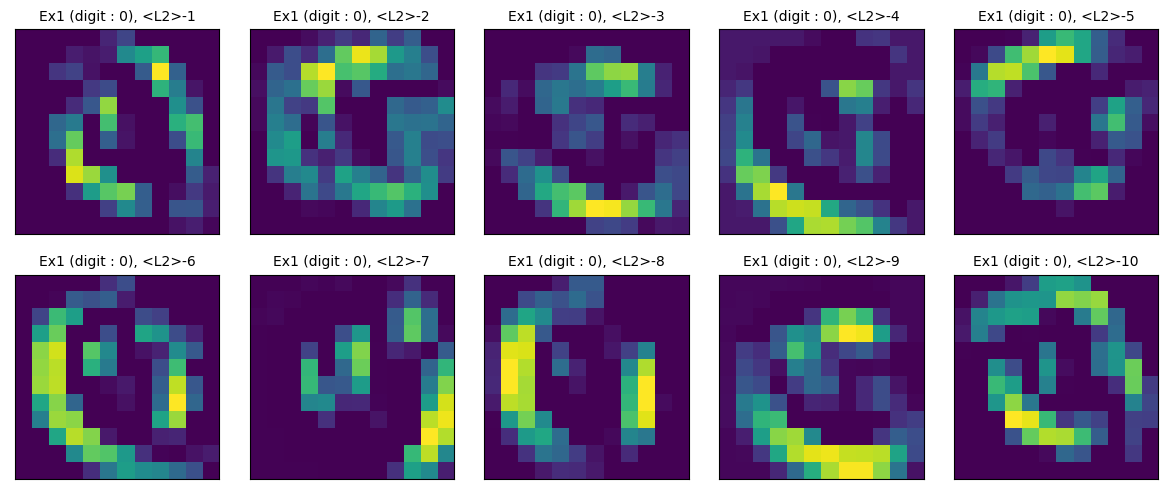

In [28]:
# Example1 1st Maxpooling Layer (L2)
l2_filters = 10; # Number of Filters

f, ax_arr = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l2_filters:
        ax.set_title('Ex1 (digit : {}), <L2>-{}'.format(digit_ex1,k+1), fontsize=10)
        ex1_l2_plot = ax.imshow(layer2_output_2[train_ids[digit_ex1]][ex1_no][:,:,k])

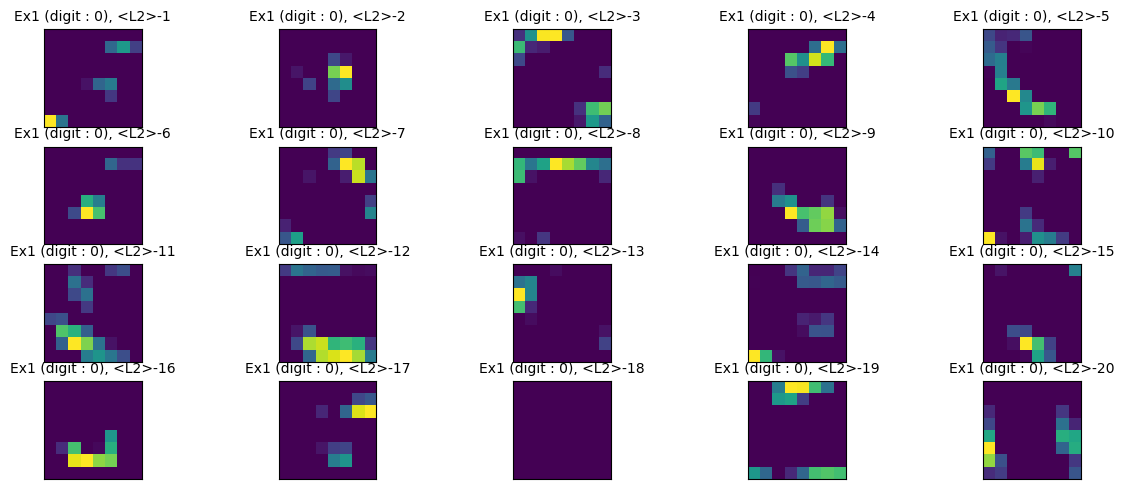

In [29]:
# Example1 2nd Convolution Layer (L3)
l3_filters = 20; # Number of Filters

f, ax_arr = plt.subplots(4, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l3_filters:
        ax.set_title('Ex1 (digit : {}), <L2>-{}'.format(digit_ex1,k+1), fontsize=10)
        ex1_l3_plot = ax.imshow(layer3_output_2[train_ids[digit_ex1]][ex1_no][:,:,k])

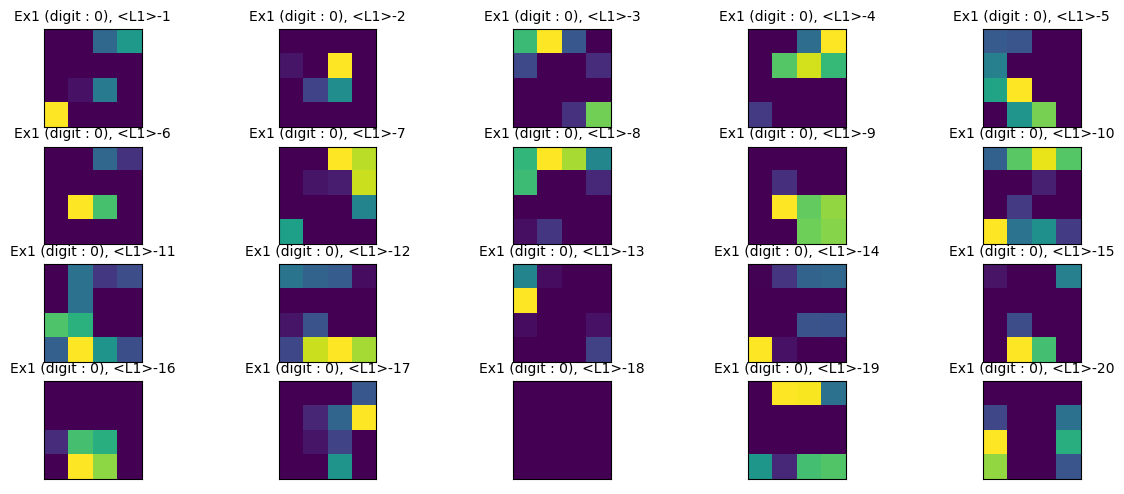

In [30]:
# Example1 2nd Maxpooling Layer (L4)
l4_filters = 20; # Number of Filters
    
f, ax_arr = plt.subplots(4, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l4_filters: # number of filter : 20
        ax.set_title('Ex1 (digit : {}), <L1>-{}'.format(digit_ex1,k+1), fontsize=10)
        ex1_l4_plot = ax.imshow(layer4_output_2[train_ids[digit_ex1]][ex1_no][:,:,k])

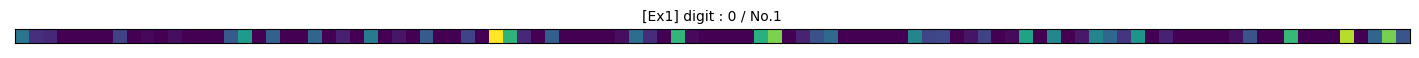

In [31]:
# Example1 Flatten-FC Layer (L5-L6)
layer6_output_2n = layer6_output_2[train_ids[digit_ex1]][ex1_no] / max(layer6_output_2[train_ids[digit_ex1]][ex1_no])
f, ax_ex1_l5 = plt.subplots(1, 1, figsize=(18,12))

ax_ex1_l5.axes.get_xaxis().set_visible(False)
ax_ex1_l5.axes.get_yaxis().set_visible(False)
ax_ex1_l5.set_title('[Ex1] digit : 0 / No.{}'.format(ex1_no + 1), fontsize=10)
ex1_l5_plot = ax_ex1_l5.imshow(layer6_output_2n.reshape(1,100))

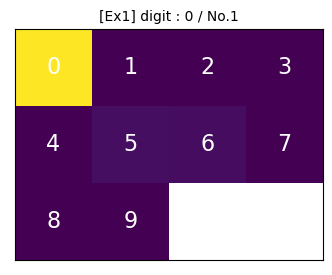

In [32]:
# Example1 Output Layer (L7)
f, ax_ex1_out = plt.subplots(1, 1, figsize=(6,3))

for i in range(3):
    for j in range(4):
        text = ax_ex1_out.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)   

ax_ex1_out.axes.get_xaxis().set_visible(False)
ax_ex1_out.axes.get_yaxis().set_visible(False)
ax_ex1_out.set_title('[Ex1] digit : 0 / No.{}'.format(ex1_no + 1), fontsize=10)
ex1_out_plot = ax_ex1_out.imshow(np.append(layer7_output_2[train_ids[digit_ex1]][ex1_no], 
                                       [np.nan, np.nan]).reshape((3,4)))

In [16]:
np.append(layer7_output_2[train_ids[digit_ex1]][ex1_no], 
                                       [np.nan, np.nan])

array([9.98918772e-01, 4.35492183e-07, 7.08310326e-05, 6.57033297e-07,
       6.91044733e-08, 2.54964136e-04, 1.66543527e-04, 3.43086448e-08,
       4.93089028e-04, 9.46188375e-05,            nan,            nan])

##### Example2

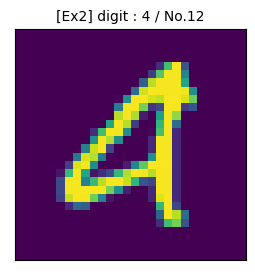

In [33]:
# Example2 selection
digit_ex2 = 4 # digit set
ex2_no = 11 # Number of digit setted

f, ax_ex2 = plt.subplots(1, 1, figsize=(6,3))

ax_ex2.axes.get_xaxis().set_visible(False)
ax_ex2.axes.get_yaxis().set_visible(False)
ax_ex2.set_title('[Ex2] digit : 4 / No.{}'.format(ex2_no + 1), fontsize=10)
ex2_plot = ax_ex2.imshow(X_trainN[train_ids[digit_ex2]][ex2_no].reshape((28,28)))

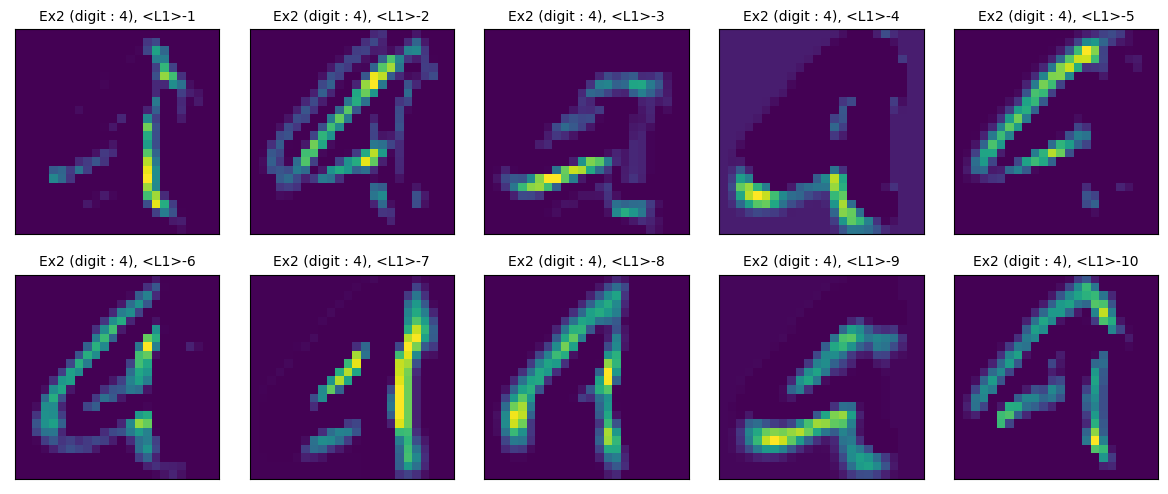

In [34]:
# Example2 1st Convolution Layer (L1)
l1_filters = 10; # Number of Filters
    
f, ax_arr = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l1_filters:
        ax.set_title('Ex2 (digit : {}), <L1>-{}'.format(digit_ex2,k+1), fontsize=10)
        ex2_l1_plot = ax.imshow(layer1_output_2[train_ids[digit_ex2]][ex2_no][:,:,k])

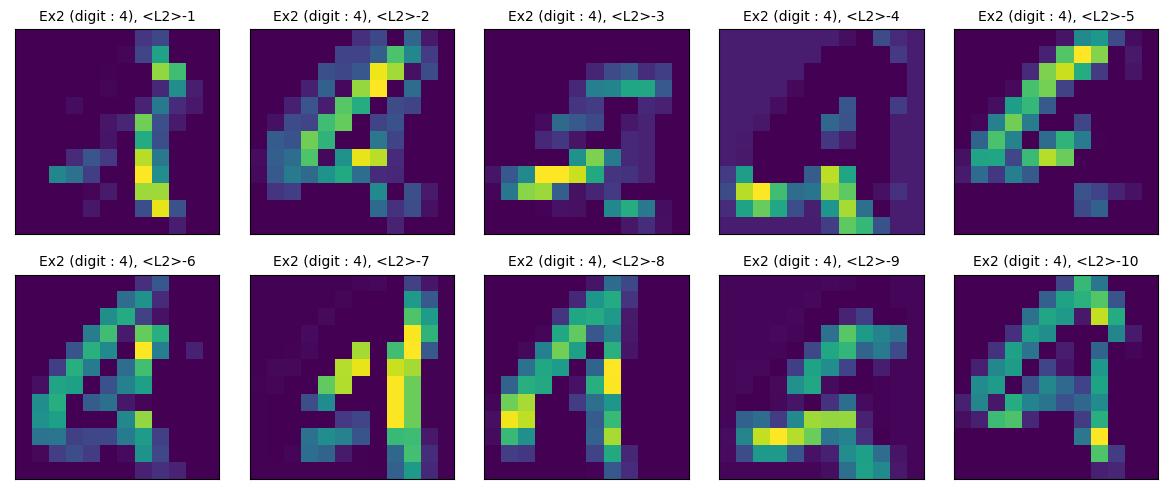

In [36]:
# Example2 1st Maxpooling Layer (L2)
l2_filters = 10; # Number of Filters

f, ax_arr = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l2_filters:
        ax.set_title('Ex2 (digit : {}), <L2>-{}'.format(digit_ex2,k+1), fontsize=10)
        ex2_l2_plot = ax.imshow(layer2_output_2[train_ids[digit_ex2]][ex2_no][:,:,k])

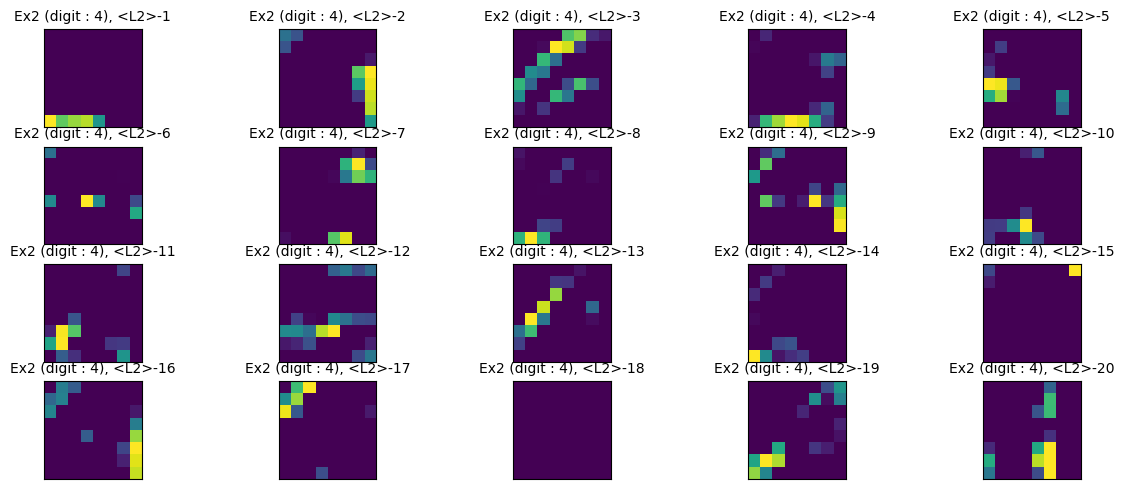

In [37]:
# Example2 2nd Convolution Layer (L3)
l3_filters = 20; # Number of Filters

f, ax_arr = plt.subplots(4, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l3_filters:
        ax.set_title('Ex2 (digit : {}), <L2>-{}'.format(digit_ex2,k+1), fontsize=10)
        ex2_l3_plot = ax.imshow(layer3_output_2[train_ids[digit_ex2]][ex2_no][:,:,k])

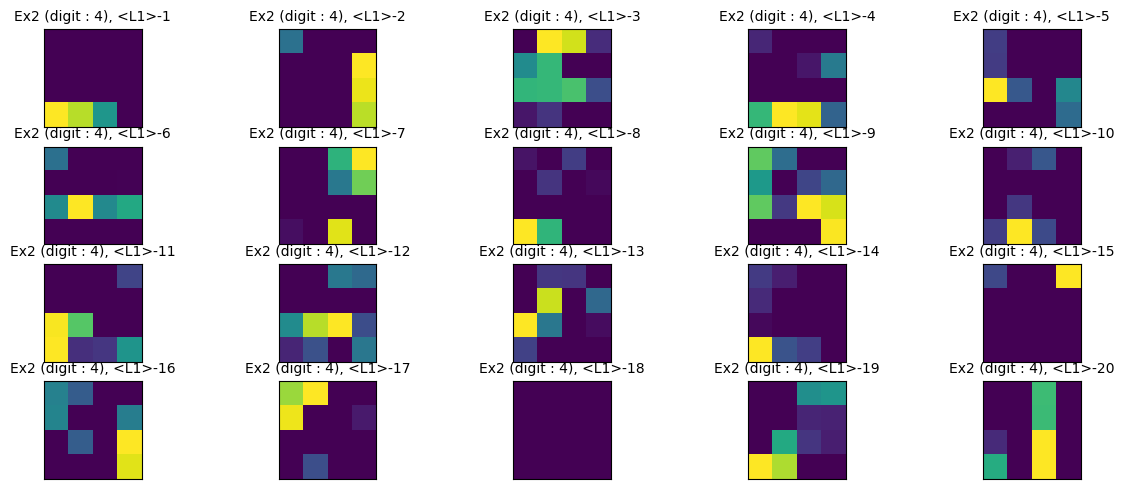

In [38]:
# Example2 2nd Maxpooling Layer (L4)
l4_filters = 20; # Number of Filters
    
f, ax_arr = plt.subplots(4, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l4_filters: # number of filter : 20
        ax.set_title('Ex2 (digit : {}), <L1>-{}'.format(digit_ex2,k+1), fontsize=10)
        ex2_l4_plot = ax.imshow(layer4_output_2[train_ids[digit_ex2]][ex2_no][:,:,k])

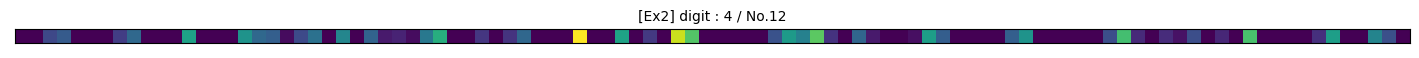

In [39]:
# Example2 Flatten-FC Layer (L5-L6)
layer6_output_2ex2 = layer6_output_2[train_ids[digit_ex2]][ex2_no] / max(layer6_output_2[train_ids[digit_ex2]][ex2_no])
f, ax_ex2_l5 = plt.subplots(1, 1, figsize=(18,12))

ax_ex2_l5.axes.get_xaxis().set_visible(False)
ax_ex2_l5.axes.get_yaxis().set_visible(False)
ax_ex2_l5.set_title('[Ex2] digit : 4 / No.{}'.format(ex2_no + 1), fontsize=10)
ex2_l5_plot = ax_ex2_l5.imshow(layer6_output_2ex2.reshape(1,100))

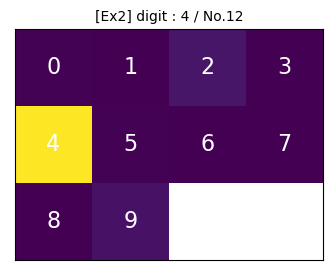

In [40]:
# Example2 Output Layer (L7)
f, ax_ex2_out = plt.subplots(1, 1, figsize=(6,3))

for i in range(3):
    for j in range(4):
        text = ax_ex2_out.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)   

ax_ex2_out.axes.get_xaxis().set_visible(False)
ax_ex2_out.axes.get_yaxis().set_visible(False)
ax_ex2_out.set_title('[Ex2] digit : 4 / No.{}'.format(ex2_no + 1), fontsize=10)
ex2_out_plot = ax_ex2_out.imshow(np.append(layer7_output_2[train_ids[digit_ex2]][ex2_no], 
                                       [np.nan, np.nan]).reshape((3,4)))

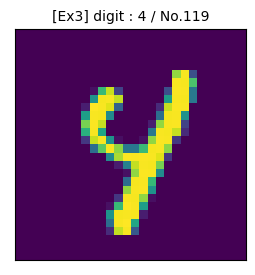

In [41]:
# Example3 selection
digit_ex3 = 4 # digit set
ex3_no = 118 # Number of digit setted

f, ax_ex3 = plt.subplots(1, 1, figsize=(6,3))

ax_ex3.axes.get_xaxis().set_visible(False)
ax_ex3.axes.get_yaxis().set_visible(False)
ax_ex3.set_title('[Ex3] digit : 4 / No.{}'.format(ex3_no + 1), fontsize=10)
ex3_plot = ax_ex3.imshow(X_trainN[train_ids[digit_ex3]][ex3_no].reshape((28,28)))

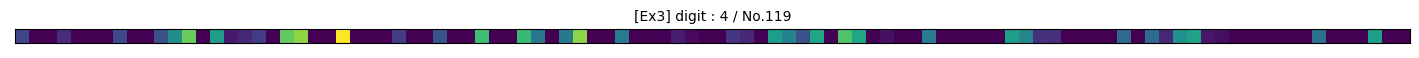

In [42]:
# Example3 Flatten-FC Layer (L5-L6)
layer6_output_2ex3 = layer6_output_2[train_ids[digit_ex3]][ex3_no] / max(layer6_output_2[train_ids[digit_ex3]][ex3_no])
f, ax_ex3_l5 = plt.subplots(1, 1, figsize=(18,12))

ax_ex3_l5.axes.get_xaxis().set_visible(False)
ax_ex3_l5.axes.get_yaxis().set_visible(False)
ax_ex3_l5.set_title('[Ex3] digit : 4 / No.{}'.format(ex3_no + 1), fontsize=10)
ex3_l5_plot = ax_ex3_l5.imshow(layer6_output_2ex3.reshape(1,100))

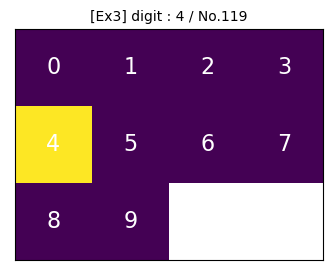

In [43]:
# Example3 Output Layer (L7)
f, ax_ex3_out = plt.subplots(1, 1, figsize=(6,3))

for i in range(3):
    for j in range(4):
        text = ax_ex3_out.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)   

ax_ex3_out.axes.get_xaxis().set_visible(False)
ax_ex3_out.axes.get_yaxis().set_visible(False)
ax_ex3_out.set_title('[Ex3] digit : 4 / No.{}'.format(ex3_no + 1), fontsize=10)
ex3_out_plot = ax_ex3_out.imshow(np.append(layer7_output_2[train_ids[digit_ex3]][ex3_no], 
                                       [np.nan, np.nan]).reshape((3,4)))

### Model.2-2(Increasing layers)

In [44]:
model_3 = models.Sequential()
model_3.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(40, (5, 5), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Dropout(0.25))
 
model_3.add(layers.Flatten())
model_3.add(layers.Dense(100, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))
model_3.summary()
 
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model_3.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_3.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 20)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 40)          20040     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 40)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 4, 4, 40)          0         
                                                                 
 flatten_1 (Flatten)         (None, 640)              

In [14]:
model_4 = models.Sequential()
model_4.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(layers.Conv2D(128, (5, 5), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(layers.Dropout(0.25))
 
model_4.add(layers.Flatten())
model_4.add(layers.Dense(100, activation='relu'))
model_4.add(layers.Dense(10, activation='softmax'))
model_4.summary()
 
model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model_4.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_4.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 12, 12, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                      

### PCA

In [180]:
# Scaling
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)
X_sc_test = scaler.transform(X_test)

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Wall time: 15.2 s


Text(0, 0.5, 'Cumulative explained variance')

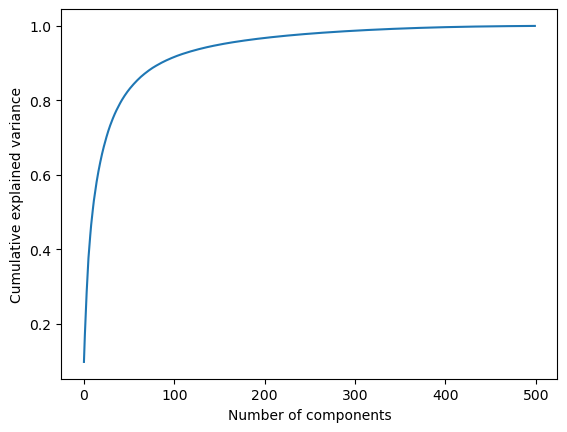

In [70]:
%%time
#for selecting number of components
pca = sklearn.decomposition.PCA(n_components=500)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [72]:
%%time
NCOMPONENTS = 120

pca = sklearn.decomposition.PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_trainN.shape)
print(X_pca_train.shape)

(31500, 784)
(31500, 120)
Wall time: 1.43 s


In [79]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

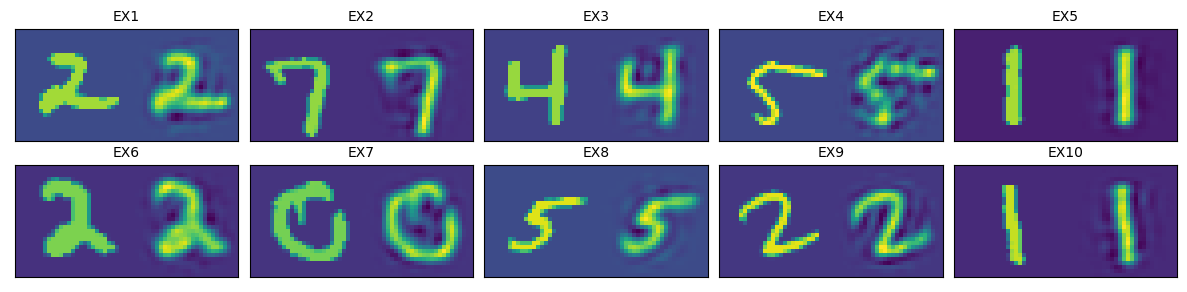

In [155]:
def side_by_side(indexes):
    org = np.array(X_train)[indexes,1:].reshape(28,28)
    rec = inv_sc[indexes,1:].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    return(pair)
    
f, ax_pca = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.75, top=1)

for k, ax_pca in enumerate(np.ravel(ax_pca)):
    ax_pca.axes.get_xaxis().set_visible(False)
    ax_pca.axes.get_yaxis().set_visible(False)
    if k <= 10:
        ax_pca.set_title('EX{}'.format(k+1), fontsize=10)
        pca_plot = ax_pca.imshow(side_by_side(k))   

In [181]:
model_5 = models.Sequential()
no_layers = 1
units = 128

model_5.add(layers.Dense(units, input_dim=NCOMPONENTS, activation='relu'))
model_5.add(layers.GaussianNoise(pca_std))
for i in range(no_layers):
    model_5.add(layers.Dense(units, activation='relu'))
    model_5.add(layers.GaussianNoise(pca_std))
    model_5.add(layers.Dropout(0.1))
model_5.add(layers.Dense(10, activation='softmax'))

model_5.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

model_5.fit(X_pca_train, Y_train, epochs=100, batch_size=256, validation_split=0.15, verbose=2)

test_loss, test_acc = model_5.evaluate(X_pca_test, Y_test, verbose=2)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/100
105/105 - 1s - loss: 2.6642 - categorical_accuracy: 0.4411 - val_loss: 0.4241 - val_categorical_accuracy: 0.8715 - 1s/epoch - 11ms/step
Epoch 2/100
105/105 - 0s - loss: 0.9615 - categorical_accuracy: 0.7635 - val_loss: 0.3542 - val_categorical_accuracy: 0.9054 - 328ms/epoch - 3ms/step
Epoch 3/100
105/105 - 0s - loss: 0.6338 - categorical_accuracy: 0.8347 - val_loss: 0.3057 - val_categorical_accuracy: 0.9158 - 352ms/epoch - 3ms/step
Epoch 4/100
105/105 - 0s - loss: 0.4768 - categorical_accuracy: 0.8665 - val_loss: 0.2746 - val_categorical_accuracy: 0.9223 - 353ms/epoch - 3ms/step
Epoch 5/100
105/105 - 0s - loss: 0.3961 - categorical_accuracy: 0.8832 - val_loss: 0.2551 - val_categorical_accuracy: 0.9291 - 343ms/epoch - 3ms/step
Epoch 6/100
105/105 - 0s - loss: 0.3374 - categorical_accuracy: 0.8984 - val_loss: 0.2293 - val_categorical_accuracy: 0.9335 - 333ms/epoch - 3ms/step
Epoch 7/100
105/105 - 0s - loss: 0.2983 - categorical_accuracy: 0.9083 - val_loss: 0.2153 - val_catego